Random Fourier Features with Cosine and Offset

[np.float64(0.6060125347361075),
 np.float64(0.08353628090152315),
 np.float64(0.05238663304162738),
 np.float64(0.04651661635258653),
 np.float64(0.04051437569821155),
 np.float64(0.030127740592400764),
 np.float64(0.033209954509956806),
 np.float64(0.02878442006324669),
 np.float64(0.02621733469335462),
 np.float64(0.02631425814453647),
 np.float64(0.027458892595073284),
 np.float64(0.023740576233949012),
 np.float64(0.023710288312945506),
 np.float64(0.024646289363521326),
 np.float64(0.02154305449971841),
 np.float64(0.018550187481088488),
 np.float64(0.018839980559512803),
 np.float64(0.02009440223820071),
 np.float64(0.015505771324523401),
 np.float64(0.018009429581386807),
 np.float64(0.01769558522794657),
 np.float64(0.01627679649071659),
 np.float64(0.016332881285137223),
 np.float64(0.015153238352981189),
 np.float64(0.017068207606837728),
 np.float64(0.015911941990952017),
 np.float64(0.014457501985657952),
 np.float64(0.01756613883200052),
 np.float64(0.015556249743863871),

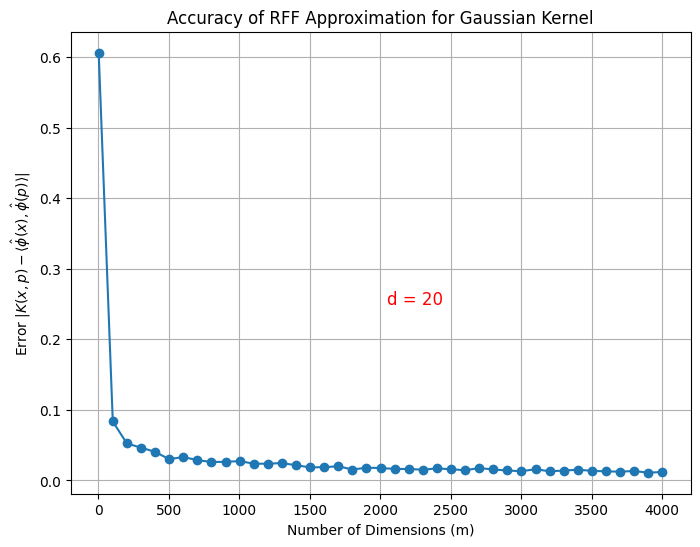

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian kernel function
def gaussian_kernel(x, p):
    return np.exp(-np.linalg.norm(x - p)**2)

# Random Fourier Features approximation
def random_fourier_features(x, W, b):
    return np.sqrt(2 / W.shape[0]) * np.cos(np.dot(W, x) + b)

# Error between Gaussian kernel and its RFF approximation
def rff_approximation_error(x, p, m, d, num_trials):
    errors = []
    
    for _ in range(num_trials):
        # Sample W from normal distribution N(0, 1) and b from uniform distribution [0, 2*pi]
        W = np.random.normal(0, 1, (m, d))
        b = np.random.uniform(0, 2 * np.pi, m)

        # Compute RFFs for x and p
        phi_x = random_fourier_features(x, W, b)
        phi_p = random_fourier_features(p, W, b)

        # Compute the kernel approximation
        approx_kernel = np.dot(phi_x, phi_p)

        # Compute the true Gaussian kernel
        true_kernel = gaussian_kernel(x, p)

        # Compute the absolute error
        error = np.abs(true_kernel - approx_kernel)
        errors.append(error)

    # Return the average error over all trials
    return np.mean(errors)

# Set parameters
d = 20  # Dimensionality of the input space
x = np.random.randn(d)
p = np.random.randn(d)

# Set larger range of m values, for example up to 1000
ms = np.arange(2, 4003, 100)  # Increasing to a higher max value of m

# Compute the error for each m with more trials
errors = [rff_approximation_error(x, p, m, d, num_trials=100) for m in ms]

display(errors)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(ms, errors, marker='o')
plt.xlabel('Number of Dimensions (m)')
plt.ylabel(r'Error $|K(x, p) - \langle \hat{\phi}(x), \hat{\phi}(p) \rangle|$')
plt.title('Accuracy of RFF Approximation for Gaussian Kernel')
plt.grid(True)
plt.text(2050, 0.25, 'd = 20', fontsize=12, color='red')
plt.show()


GloVe embedding

In [15]:
import numpy as np

# Load the GloVe model from a pre-trained file (50-dimensional version)
def load_glove_model(glove_file):
    print("Loading GloVe model...")
    model = {}
    with open(glove_file, 'r', encoding="utf-8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array([float(val) for val in split_line[1:]])
            model[word] = embedding
    print(f"Loaded {len(model)} words.")
    return model

# Function to compute cosine similarity
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Function to compute cosine distance
def cosine_distance(vec1, vec2):
    return 1 - cosine_similarity(vec1, vec2)

# Example usage with GloVe embeddings
glove_file = "glove.6B.50d.txt"  # Path to the GloVe embeddings file
glove_model = load_glove_model(glove_file)

# Select some word pairs
words_similar = [
    ("king", "queen"),
    ("dog", "puppy"),
    ("car", "automobile"),
    ("man", "woman"),
    ("apple", "fruit"),
    ("cat", "kitten"),
    ("big", "large"),
    ("happy", "joyful")
]
words_different = [
    ("king", "car"),
    ("dog", "banana"),
    ("car", "justice"),
    ("apple", "computer"),
    ("happy", "sad"),
    ("man", "banana"),
    ("ocean", "mountain"),
    ("light", "dark")
]

# Compute cosine distances for similar words
print("Cosine distances for similar words:")
for word1, word2 in words_similar:
    vec1 = glove_model[word1]
    vec2 = glove_model[word2]
    dist = cosine_distance(vec1, vec2)
    print(f"{word1} - {word2}: {dist:.4f}")

# Compute cosine distances for different words
print("\nCosine distances for different words:")
for word1, word2 in words_different:
    vec1 = glove_model[word1]
    vec2 = glove_model[word2]
    dist = cosine_distance(vec1, vec2)
    print(f"{word1} - {word2}: {dist:.4f}")

Loading GloVe model...
Loaded 400000 words.
Cosine distances for similar words:
king - queen: 0.2161
dog - puppy: 0.2245
car - automobile: 0.3044
man - woman: 0.1140
apple - fruit: 0.4082
cat - kitten: 0.3614
big - large: 0.3254
happy - joyful: 0.4450

Cosine distances for different words:
king - car: 0.7374
dog - banana: 0.6665
car - justice: 0.8428
apple - computer: 0.3597
happy - sad: 0.3109
man - banana: 0.7983
ocean - mountain: 0.3311
light - dark: 0.2698
